In [1]:
import pandas as pd

ratings = [['john', 5, 5, 2, 1], ['mary', 4, 5, 3, 2], ['bob', 4, 4, 4, 3], ['lisa', 2, 2, 4, 5], ['lee', 1, 2, 3, 4], ['harry', 2, 1, 5, 5]]
titles = ['user', 'Jaws', 'Star Wars', 'Exorcist', 'Omen']
movies = pd.DataFrame(ratings, columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In [3]:
from sklearn import cluster

data = movies.drop('user', axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,1
mary,1
bob,1
lisa,0
lee,0
harry,0


In [4]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids, columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,1.666667,1.666667,4.0,4.666667
1,4.333333,4.666667,3.0,2.000000


In [5]:
import numpy as np

testData = np.array([[4, 5, 1, 2], [3, 2, 4, 4], [2, 3, 4, 1], [3, 2, 3, 3], [5, 4, 1, 4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1, 1)
usernames = np.array(['paul', 'kim', 'liz', 'tom', 'bill']).reshape(-1, 1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1), columns=cols)
newusers

,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,1
1,kim,3,2,4,4,0
2,liz,2,3,4,1,1
3,tom,3,2,3,3,0
4,bill,5,4,1,4,1


Text(0, 0.5, 'SSE')

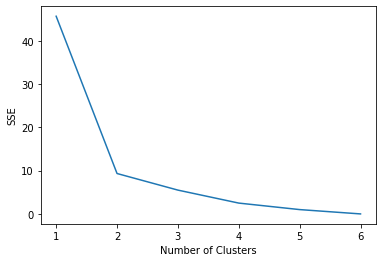

In [6]:
import matplotlib.pyplot as plt

numClusters = [1, 2, 3, 4, 5, 6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [7]:
import pandas as pd
data = pd.read_csv('/Volumes/Dam/홍익대학교/교과목/홍익대학교3-2/데이터마이닝/과제제출/W3_P7_B989032이다민/vertebrate.csv', header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


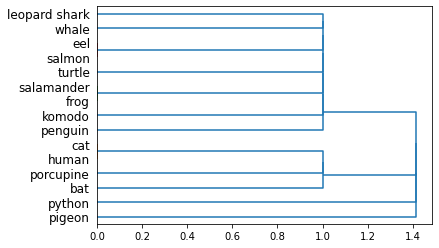

In [17]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name', 'Class'], axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')

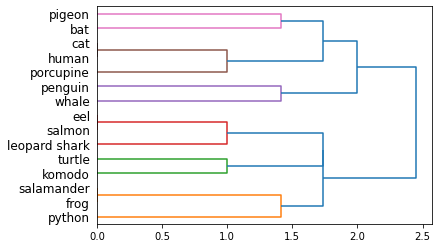

In [19]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z, labels=names.tolist(), orientation='right')